In [1]:
%run ../talktools.py

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/profjsb/python-seminar/blob/master/DataFiles_and_Notebooks/07_machine_learning_2/02_neural_nets_with_keras.ipynb)


# Deep Learning Frameworks

AY 250 (UC Berkeley; 2012-2022)

<div class="alert alert-info">sklearn is not built for deep/complex networks such as required in covnets (as we'll see later on). We must go to specialized software (and potentially specialized hardware)</div>

Almost all frameworks written in low-level C++/C with Python (or other scripting bindings)

### Low-level frameworks

   - Tensorflow (Google) Nov 2015. See https://www.tensorflow.org/api_docs/python/tf
   - pytorch (Python). https://pytorch.org/docs/stable/index.html
   - Theano
   - Caffe (Berkeley)
   - Torch (Lua)
   - CNTK (Microsoft)
   - Chainer
   - PaddlePaddle (Baidu) Aug 2016
   
### High-level frameworks (Python)

   - Keras (atop Tensorflow, Theano) - https://www.tensorflow.org/api_docs/python/tf/keras
   - Skorch - scikit-learn compatible neural network library that wraps PyTorch (https://github.com/skorch-dev/skorch)
   - FastAI: https://docs.fast.ai/
   - PyTorch Lightning (https://github.com/PyTorchLightning/pytorch-lightning)
   
<img src="https://pbs.twimg.com/media/DX0lfBNU8AEs8KG.png:large" width="75%">
Source: https://twitter.com/fchollet/status/971863128341323776

See also: https://www.reddit.com/r/MachineLearning/comments/esrtxu/d_which_pytorchcompatible_training_abstraction/

<blockquote class="twitter-tweet" data-lang="en"><p lang="en" dir="ltr">TensorFlow is the platform of choice for deep learning in the research community. These are deep learning framework mentions on arXiv over the past 3 months <img src="https://pbs.twimg.com/media/DXy_uc0VAAAIhKG.jpg:small">

&mdash; François Chollet (@fchollet) <a href="https://twitter.com/fchollet/status/971863128341323776?ref_src=twsrc%5Etfw">March 8, 2018</a></blockquote>
<script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>


see also: https://github.com/mbadry1/Top-Deep-Learning

Autoencoder: Go through and propogate to hidden layer bottle neck and then predict. "compressor" to a "decompressor" (AE)

DCNs -- you have a kernel cell (transformation of input data) then to outputs

<img src="http://www.asimovinstitute.org/wp-content/uploads/2016/09/neuralnetworks.png">

Source: http://www.asimovinstitute.org/neural-network-zoo/

An example (from Josh's student work): 

<img src="https://github.com/profjsb/deepCR/raw/master/imgs/network.png">

<img src="https://raw.githubusercontent.com/profjsb/deepCR/master/imgs/postage-sm.jpg">

"deepCR: Deep Learning Based Cosmic Ray Removal for Astronomical Images"
https://github.com/profjsb/deepCR

# Keras


"Use Keras if you need a deep learning library that:

Allows for easy and fast prototyping (through user friendliness, modularity, and extensibility).
Supports both convolutional networks and recurrent networks, as well as combinations of the two.
Runs seamlessly on CPU and GPU."

-- keras.io

<img src="https://www.digikey.com/maker-media/6c3d4f5f-98e0-4104-ad8c-fb0b47000109">

Let's load up the California housing data as in the previous notebook.

In [1]:
import math

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

from sklearn import datasets
from sklearn.preprocessing import StandardScaler  

cal_data = datasets.fetch_california_housing()
X = cal_data['data']   # 8 features 
Y = cal_data['target'] # response (median house price)

half = math.floor(len(Y)/2)
train_X = X[:half]
train_Y = Y[:half]
test_X = X[half:]
test_Y = Y[half:]

scaler = StandardScaler()  

# Don't cheat - fit only on training data
scaler.fit(train_X)  
train_X = scaler.transform(train_X)  

# apply same transformation to test data
test_X = scaler.transform(test_X)

In [2]:
test_X[0,:]

array([ 1.83091342, -1.31085329,  0.84047027, -0.15023587,  0.25295181,
        0.0466981 , -0.83013107,  0.92616793])

In [3]:
num_input_features = train_X.shape[1]
print(f'number of input features = {num_input_features}')

number of input features = 8


In [4]:
import datetime, os

import tensorflow.keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
import tensorflow as tf

tf.config.set_visible_devices([], 'GPU')

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# Print keras version
print(tensorflow.keras.__version__)

from tensorflow import keras
print(f"backend={keras.backend.backend()}")

2.8.0
backend=tensorflow


In [5]:
# multi-layer percepton
# last layer is linear to transmit data
# Take weights of last layer, sum up, and apply linear acitvation
# if you did relu, only positive nubmers would be transmitted...

# adam starts with big gradient updates and then slows down as it approached
# correct value

def nn_clf():
    model = Sequential()
    model.add(Dense(32, input_shape=(num_input_features,), 
                      activation="relu", kernel_initializer='random_uniform'))
    model.add(Dense(32,  activation="relu", kernel_initializer='random_uniform', name="dan"))
    model.add(Dense(10,  activation="relu", kernel_initializer='random_uniform'))
    model.add(Dense(1, activation="linear", kernel_initializer='random_uniform'))
    model.compile(optimizer='adam', loss='mean_squared_error',  metrics=['mae',"mse"])
    return model

In [6]:
model = nn_clf()

model.summary()

# 288 because 8 input numbers going to 32 numbers plus 32 bias parameters

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                288       
                                                                 
 dan (Dense)                 (None, 32)                1056      
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,685
Trainable params: 1,685
Non-trainable params: 0
_________________________________________________________________


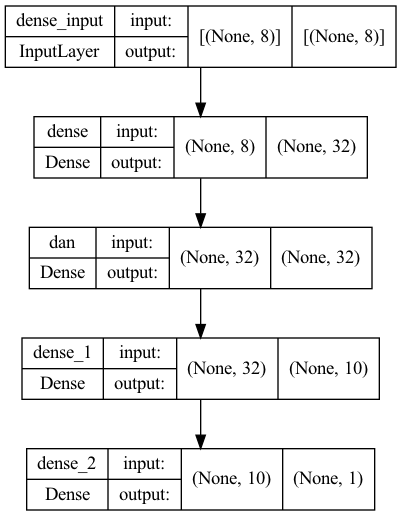

In [7]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model_plot.png', show_shapes=True, 
                   show_layer_names=True)

from IPython.display import Image
Image("model_plot.png")

In [8]:
# !pip install scikeras


In [9]:
from scikeras.wrappers import KerasClassifier, KerasRegressor
from sklearn.model_selection import cross_val_score, KFold

clf = KerasRegressor(model=nn_clf, batch_size=32, epochs=50)
clf.fit(train_X, train_Y)

Epoch 1/50
323/323 [==============================] - 0s 607us/step - loss: 1.6165 - mae: 0.8758 - mse: 1.6165
Epoch 2/50
323/323 [==============================] - 0s 648us/step - loss: 0.4240 - mae: 0.4671 - mse: 0.4240
Epoch 3/50
323/323 [==============================] - 0s 634us/step - loss: 0.3905 - mae: 0.4480 - mse: 0.3905
Epoch 4/50
323/323 [==============================] - 0s 638us/step - loss: 0.3779 - mae: 0.4380 - mse: 0.3779
Epoch 5/50
323/323 [==============================] - 0s 602us/step - loss: 0.3688 - mae: 0.4336 - mse: 0.3688
Epoch 6/50
323/323 [==============================] - 0s 618us/step - loss: 0.3606 - mae: 0.4260 - mse: 0.3606
Epoch 7/50
323/323 [==============================] - 0s 607us/step - loss: 0.3568 - mae: 0.4212 - mse: 0.3568
Epoch 8/50
323/323 [==============================] - 0s 610us/step - loss: 0.3522 - mae: 0.4198 - mse: 0.3522
Epoch 9/50
323/323 [==============================] - 0s 635us/step - loss: 0.3468 - mae: 0.4158 - mse: 0.3468
E

KerasRegressor(
	model=<function nn_clf at 0x1059af310>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=32
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=50
)

323/323 [==============================] - 0s 322us/step
MSE 0.5256889756965322
323/323 [==============================] - 0s 296us/step


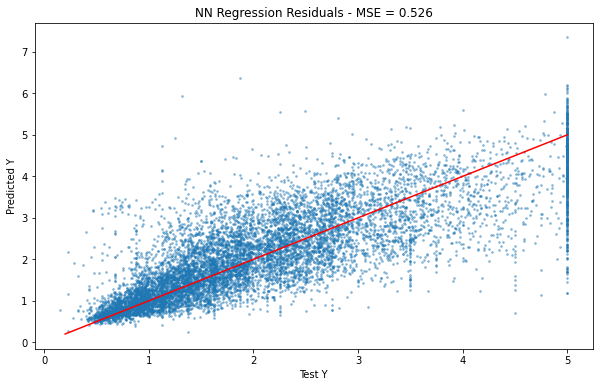

In [10]:
# how well did we do?
import numpy as np
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_Y, clf.predict(test_X)) ; print("MSE",mse)

plt.figure(figsize=(10,6))
plt.title("NN Regression Residuals - MSE = %.3f" % mse)
plt.scatter(test_Y,clf.predict(test_X),alpha=0.4,s=3)
plt.xlabel("Test Y")
plt.ylabel("Predicted Y")
plt.plot([0.2,5],[0.2,5],c="r")

### A More Complete Example

We want to train and make some decisions of when to stop based on `validation` data. Ultimately, we'd like to see how well our model would do on truly new data (`test`).


In [11]:
train_percentage, valid_percentage, test_percentage = (0.90, 0.05, 0.05)

In [12]:
from sklearn.model_selection import train_test_split

rnd = np.random.RandomState(41)

# make an array with the indices of all the rows in the dataset
ind_arr = np.arange(X.shape[0])
rnd.shuffle(ind_arr)

train_ind, tmp = train_test_split(ind_arr, train_size=train_percentage, random_state=rnd)
valid_ind, test_ind = \
      train_test_split(tmp, train_size=valid_percentage/(valid_percentage + test_percentage), 
                               random_state=rnd)

Let's make sure that we're getting all the indicies

In [13]:
assert np.all(np.array(sorted(list(train_ind) + list(valid_ind) + list(test_ind)))  == \
              sorted(ind_arr))

In [14]:
train_ind.shape, test_ind.shape, valid_ind.shape

((18576,), (1032,), (1032,))

Now let's scale the inputs

In [15]:
scaler = StandardScaler()  

train_X = X[train_ind]
# Don't cheat - fit only on training data
scaler.fit(train_X)  
train_X = scaler.transform(train_X)  

# apply same transformation to test, validation data
test_X = scaler.transform(X[test_ind])
valid_X = scaler.transform(X[valid_ind])

train_y = Y[train_ind] ; test_y = Y[test_ind] ; valid_y = Y[valid_ind]

assert train_y.shape[0] == train_X.shape[0]
assert test_y.shape[0] == test_X.shape[0]
assert valid_y.shape[0] == valid_X.shape[0]

In [16]:
model = Sequential()
model.add(Dense(32, input_shape=(num_input_features,), 
                  activation="relu", kernel_initializer='random_uniform'))
model.add(Dense(32,  activation="relu", kernel_initializer='random_uniform'))
model.add(Dense(5,  activation="relu", kernel_initializer='random_uniform'))
model.add(Dense(1, activation="linear", kernel_initializer='random_uniform'))

The `Model.compile` method in `keras` has a number of input parameters:

```python
compile(optimizer, loss=None, metrics=None, loss_weights=None, sample_weight_mode=None, weighted_metrics=None, target_tensors=None)
```
Usually, you'll set the `optimizer`, `loss`, and `metrics`.

https://keras.io/models/model/

In [17]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 32)                288       
                                                                 
 dense_7 (Dense)             (None, 32)                1056      
                                                                 
 dense_8 (Dense)             (None, 5)                 165       
                                                                 
 dense_9 (Dense)             (None, 1)                 6         
                                                                 
Total params: 1,515
Trainable params: 1,515
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(optimizer='adam', loss='mean_squared_error',  metrics=['mae',"mse"])

In [19]:
import datetime
import os

from tensorflow.keras.callbacks import EarlyStopping, CSVLogger, \
                                                ReduceLROnPlateau, ModelCheckpoint, TensorBoard

try:
    os.mkdir('nn_results')
except:
    pass

batch_size=64
num_epochs = 200

run_time_string = datetime.datetime.utcnow().isoformat(timespec='minutes')

# define path to save model
model_path = f'nn_results/ay250_nn_{run_time_string}.h5'
print(f"Training ... {model_path}")

# Tensorboard is a project which can ingest learning logs for interactive display...
# more on that later.
tb = TensorBoard(log_dir='nn_results', histogram_freq=0,
                 write_graph=True, 
                 write_grads=False, 
                 write_images=False, 
                 embeddings_freq=0, 
                 embeddings_layer_names=None, 
                 embeddings_metadata=None, embeddings_data=None)

reduce_lr = ReduceLROnPlateau(monitor='val_mse', factor=0.75,
                              patience=3, min_lr=1e-6, verbose=1, cooldown=0)

csv_logger = CSVLogger(f'nn_results/training_{run_time_string}.log')

earlystop = EarlyStopping(monitor='val_mse', min_delta=0.001, patience=10, \
                          verbose=1, mode='auto')

model_check = ModelCheckpoint(model_path,
        monitor='val_mse', 
        save_best_only=True, 
        mode='min',
        verbose=1)

Training ... nn_results/ay250_nn_2022-04-04T19:17.h5


The `Model.fit` method:

```python
fit(x=None, y=None, batch_size=None, epochs=1, verbose=1, callbacks=None, validation_split=0.0, validation_data=None, shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0, steps_per_epoch=None, validation_steps=None, validation_freq=1)
```

In [20]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
    print('GPU device not found')
    has_gpu = False
else:
    print('Found GPU at: {}'.format(device_name))
    has_gpu = True

Found GPU at: /device:GPU:0


In [21]:
history = model.fit(x=train_X, y=train_y,
               epochs=num_epochs,
               validation_data=(valid_X, valid_y),
               verbose=1, shuffle=True,
               callbacks=[csv_logger, earlystop, model_check, tb])

Epoch 1/200
531/581 [==========================>...] - ETA: 0s - loss: 1.2291 - mae: 0.7549 - mse: 1.2291
Epoch 1: val_mse improved from inf to 0.48994, saving model to nn_results/ay250_nn_2022-04-04T19:17.h5
581/581 [==============================] - 1s 764us/step - loss: 1.1619 - mae: 0.7308 - mse: 1.1619 - val_loss: 0.4899 - val_mae: 0.5021 - val_mse: 0.4899
Epoch 2/200
527/581 [==========================>...] - ETA: 0s - loss: 0.4298 - mae: 0.4677 - mse: 0.4298
Epoch 2: val_mse improved from 0.48994 to 0.47489, saving model to nn_results/ay250_nn_2022-04-04T19:17.h5
581/581 [==============================] - 0s 632us/step - loss: 0.4286 - mae: 0.4660 - mse: 0.4286 - val_loss: 0.4749 - val_mae: 0.4837 - val_mse: 0.4749
Epoch 3/200
530/581 [==========================>...] - ETA: 0s - loss: 0.4126 - mae: 0.4542 - mse: 0.4126
Epoch 3: val_mse improved from 0.47489 to 0.46979, saving model to nn_results/ay250_nn_2022-04-04T19:17.h5
581/581 [==============================] - 0s 655us/ste

Epoch 25/200
530/581 [==========================>...] - ETA: 0s - loss: 0.3250 - mae: 0.3964 - mse: 0.3250
Epoch 25: val_mse improved from 0.39773 to 0.38408, saving model to nn_results/ay250_nn_2022-04-04T19:17.h5
581/581 [==============================] - 0s 630us/step - loss: 0.3268 - mae: 0.3966 - mse: 0.3268 - val_loss: 0.3841 - val_mae: 0.4172 - val_mse: 0.3841
Epoch 26/200
538/581 [==========================>...] - ETA: 0s - loss: 0.3209 - mae: 0.3924 - mse: 0.3209
Epoch 26: val_mse improved from 0.38408 to 0.37729, saving model to nn_results/ay250_nn_2022-04-04T19:17.h5
581/581 [==============================] - 0s 620us/step - loss: 0.3217 - mae: 0.3928 - mse: 0.3217 - val_loss: 0.3773 - val_mae: 0.4252 - val_mse: 0.3773
Epoch 27/200
532/581 [==========================>...] - ETA: 0s - loss: 0.3177 - mae: 0.3888 - mse: 0.3177
Epoch 27: val_mse improved from 0.37729 to 0.37638, saving model to nn_results/ay250_nn_2022-04-04T19:17.h5
581/581 [==============================] - 0s

581/581 [==============================] - 0s 655us/step - loss: 0.2876 - mae: 0.3654 - mse: 0.2876 - val_loss: 0.3433 - val_mae: 0.3942 - val_mse: 0.3433
Epoch 50/200
538/581 [==========================>...] - ETA: 0s - loss: 0.2863 - mae: 0.3650 - mse: 0.2863
Epoch 50: val_mse did not improve from 0.34328
581/581 [==============================] - 0s 600us/step - loss: 0.2877 - mae: 0.3651 - mse: 0.2877 - val_loss: 0.3516 - val_mae: 0.4055 - val_mse: 0.3516
Epoch 51/200
529/581 [==========================>...] - ETA: 0s - loss: 0.2844 - mae: 0.3649 - mse: 0.2844
Epoch 51: val_mse did not improve from 0.34328
581/581 [==============================] - 0s 610us/step - loss: 0.2851 - mae: 0.3647 - mse: 0.2851 - val_loss: 0.3570 - val_mae: 0.4089 - val_mse: 0.3570
Epoch 52/200
537/581 [==========================>...] - ETA: 0s - loss: 0.2870 - mae: 0.3660 - mse: 0.2870
Epoch 52: val_mse did not improve from 0.34328
581/581 [==============================] - 0s 600us/step - loss: 0.2870 -

In [22]:
!ls nn_results/

ay250_nn_2022-04-04T17:54.h5  training_2022-04-04T17:54.log
ay250_nn_2022-04-04T19:17.h5  training_2022-04-04T19:17.log
train                         validation


Let's look at the history of the training results:

In [23]:
lastest_log_file = !ls -t1 nn_results/training* | head -1
hist_df = pd.read_csv(lastest_log_file[0])
hist_df

,epoch,loss,mae,mse,val_loss,val_mae,val_mse
0,0,1.161940,0.730839,1.161940,0.489938,0.502066,0.489938
1,1,0.428634,0.465961,0.428634,0.474887,0.483683,0.474887
2,2,0.414049,0.455386,0.414049,0.469793,0.484370,0.469793
3,3,0.405055,0.448723,0.405055,0.472569,0.498850,0.472569
4,4,0.396744,0.444583,0.396744,0.466027,0.478992,0.466027
...,...,...,...,...,...,...,...
66,66,0.276980,0.357711,0.276980,0.352955,0.394606,0.352955
67,67,0.279135,0.358601,0.279135,0.346788,0.394877,0.346788
68,68,0.276105,0.357476,0.276105,0.350654,0.392405,0.350654
69,69,0.275213,0.356326,0.275213,0.351634,0.396940,0.351634


This is also available in the return value from `.fit`:

In [24]:
history.history.keys()

dict_keys(['loss', 'mae', 'mse', 'val_loss', 'val_mae', 'val_mse'])

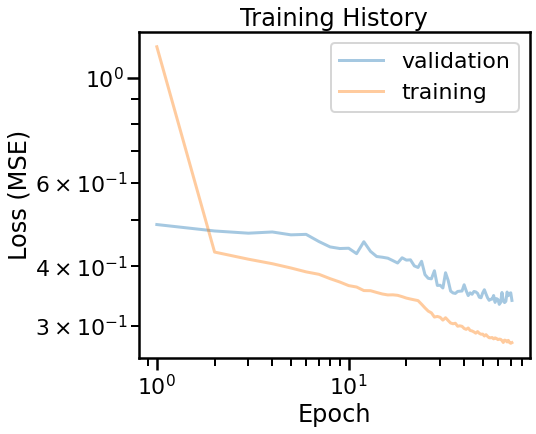

In [25]:
import seaborn as sns
sns.set_context("poster")
plt.figure(figsize=(7,6))
plt.title("Training History")
plt.plot(hist_df.index + 1,hist_df["val_mse"] ,alpha=0.4, label="validation")
plt.plot(hist_df.index + 1,hist_df["mse"] ,alpha=0.4, label="training")

plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.loglog()
plt.legend()

Let's take a look at the predictions on the test set

In [26]:
!ls nn_results

ay250_nn_2022-04-04T17:54.h5  training_2022-04-04T17:54.log
train                         validation


In [ ]:
#!pip install 'h5py==2.10.0' --force-reinstall

In [26]:
# reload the best model
from tensorflow.keras.models import load_model
import tensorflow as tf

model = load_model("nn_results/ay250_nn_2022-04-04T19:17.h5")

In [27]:
pred_y = model.predict(test_X)
pred_y

array([[2.2216864 ],
       [0.85954016],
       [1.5983793 ],
       ...,
       [1.3001375 ],
       [1.8034052 ],
       [3.6975365 ]], dtype=float32)

MSE 0.2287700070557135


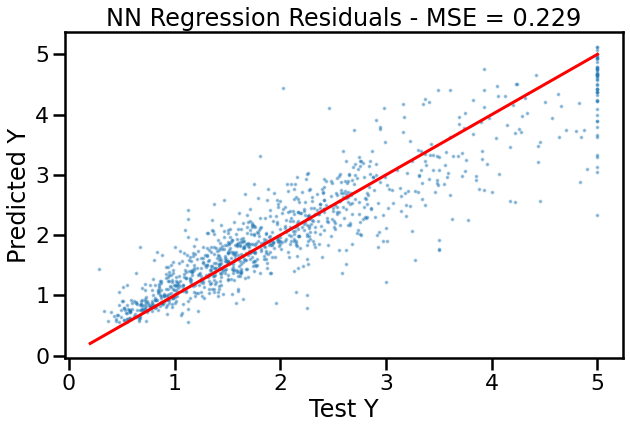

In [28]:
# how well did we do?
import numpy as np
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_y, pred_y[:,0]); print("MSE",mse)

plt.figure(figsize=(10,6))
plt.title("NN Regression Residuals - MSE = %.3f" % mse)
plt.scatter(test_y,pred_y[:,0] ,alpha=0.4,s=3)
plt.xlabel("Test Y")
plt.ylabel("Predicted Y")
plt.plot([0.2,5],[0.2,5],c="r")

How did we do compared to the validation and training data?

If you're interested in hyperparameter optimization, you could try out Weights & Biases for Keras (https://wandb.ai/site/articles/intro-to-keras-with-weights-biases).

## Aside: Training on a GPU (on Colab)

In [ ]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
    print('GPU device not found')
    has_gpu = False
else:
    print('Found GPU at: {}'.format(device_name))
    has_gpu = True

Build, compile, and fit the model within the GPU context:
```python
with tf.device('/device:GPU:0'):
  model = Sequential()
  model.add(Dense(32, input_shape=(num_input_features,), 
                    activation="relu", kernel_initializer='random_uniform'))
  ...
  model.compile(optimizer='adam', loss='mean_squared_error',  metrics=['mae',"mse"])
  
  history = model.fit(x=train_X, y=train_y,
               epochs=num_epochs,
               validation_data=(valid_X, valid_y),
               verbose=1, shuffle=True,
               callbacks=[csv_logger, earlystop, model_check, tb])
```

To use the TPU (way overkill for this project) see https://colab.research.google.com/github/tensorflow/tpu/blob/master/tools/colab/fashion_mnist.ipynb

In [ ]:
#!pip install watermark

In [ ]:
%load_ext watermark

In [34]:
%watermark --iversions

numpy     : 1.20.3
autopep8  : 1.6.0
sklearn   : 0.0
seaborn   : 0.11.2
json      : 2.0.9
matplotlib: 3.5.1
tensorflow: 2.8.0
keras     : 2.8.0
pandas    : 1.3.5

